

> Nama : I Gede Angga Dinata


> Username : I Gede Angga Dinata

In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rockpaperscissors.zip

--2020-10-30 15:43:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.18MB/s    in 44s     

2020-10-30 15:43:49 (7.05 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
pip install split-folders

In [5]:
import splitfolders
base_dir = '/tmp/rockpaperscissors'
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors', seed=1337, ratio=(.6,.4))

Copying files: 2189 files [00:00, 3405.49 files/s]


In [6]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [7]:
os.listdir('/tmp/rockpaperscissors/train')

['scissors', 'paper', 'rock', 'rps-cv-images']

In [8]:
os.listdir('/tmp/rockpaperscissors/val')

['scissors', 'paper', 'rock', 'rps-cv-images']

In [9]:
train_rock_dir = os.path.join(train_dir,'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(val_dir, 'rock')
val_paper_dir = os.path.join(val_dir,'paper')
val_scissors_dir = os.path.join(val_dir, 'scissors')

In [10]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                   rescale = 1./255,
                   rotation_range = 20,
                   horizontal_flip = True,
                   shear_range = 0.2,
                   fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 4,
        class_mode = 'categorical')
val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size = (150,150),
        batch_size = 4,
        class_mode = 'categorical')

Found 1312 images belonging to 4 classes.
Found 876 images belonging to 4 classes.


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

earlyStopping = EarlyStopping(
     monitor='accuracy', 
     mode='max', 
     verbose=1, 
     patience=15)
modelCheckpoint = ModelCheckpoint(
     'best_model.h5', 
     monitor='accuracy', 
     mode='max', 
     verbose=1, 
     save_best_only=True)

history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=100,
      validation_data=val_generator,
      validation_steps = 8,
      callbacks=[earlyStopping, modelCheckpoint],
      verbose = 2)

Epoch 1/100

Epoch 00001: accuracy improved from -inf to 0.37000, saving model to best_model.h5
25/25 - 7s - loss: 1.4981 - accuracy: 0.3700 - val_loss: 1.1386 - val_accuracy: 0.5000
Epoch 2/100

Epoch 00002: accuracy did not improve from 0.37000
25/25 - 6s - loss: 1.1905 - accuracy: 0.3500 - val_loss: 1.0566 - val_accuracy: 0.4688
Epoch 3/100

Epoch 00003: accuracy improved from 0.37000 to 0.41000, saving model to best_model.h5
25/25 - 6s - loss: 1.1414 - accuracy: 0.4100 - val_loss: 1.0770 - val_accuracy: 0.4375
Epoch 4/100

Epoch 00004: accuracy improved from 0.41000 to 0.46000, saving model to best_model.h5
25/25 - 6s - loss: 1.1385 - accuracy: 0.4600 - val_loss: 0.9303 - val_accuracy: 0.6562
Epoch 5/100

Epoch 00005: accuracy improved from 0.46000 to 0.68000, saving model to best_model.h5
25/25 - 6s - loss: 0.9012 - accuracy: 0.6800 - val_loss: 0.7202 - val_accuracy: 0.6875
Epoch 6/100

Epoch 00006: accuracy improved from 0.68000 to 0.79000, saving model to best_model.h5
25/25 - 6

Saving 235103.jpg to 235103.jpg
235103.jpg
Paper


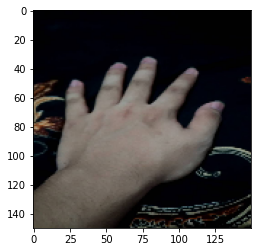

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissor')